In [1]:
!pip install yfinance

<Figure size 1000x600 with 0 Axes>

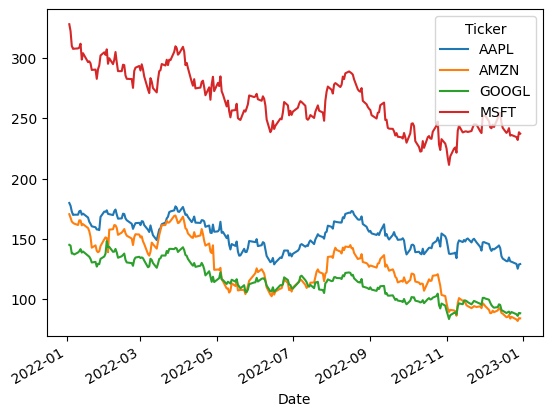

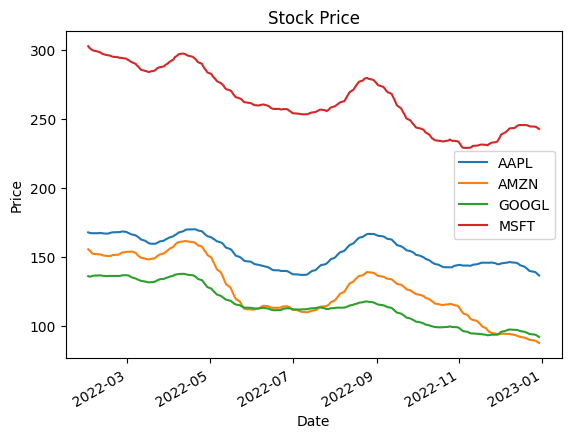

<ipython-input-31-ccc6cb18b920>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(pd.DataFrame(np.nan, index=range(len(stock_data), len(daily_returns_numeric)), columns=stock_data.columns))


1000
251


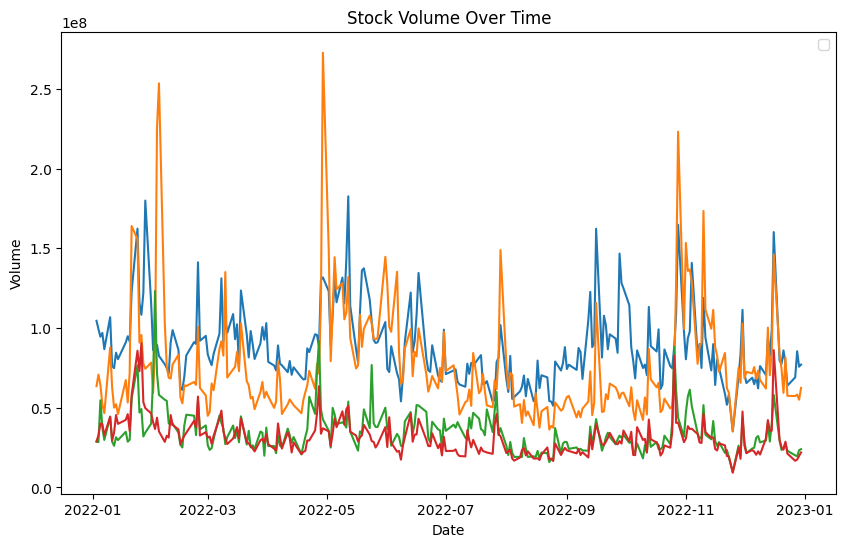

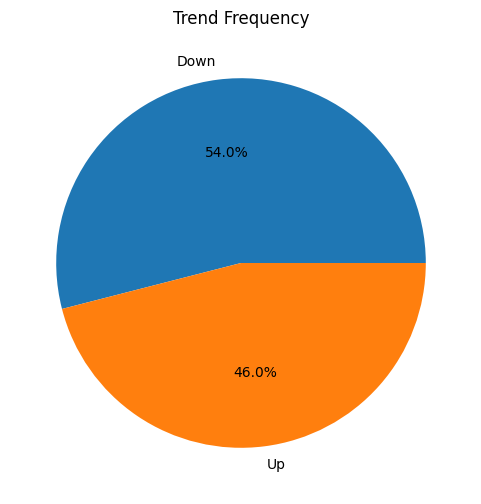

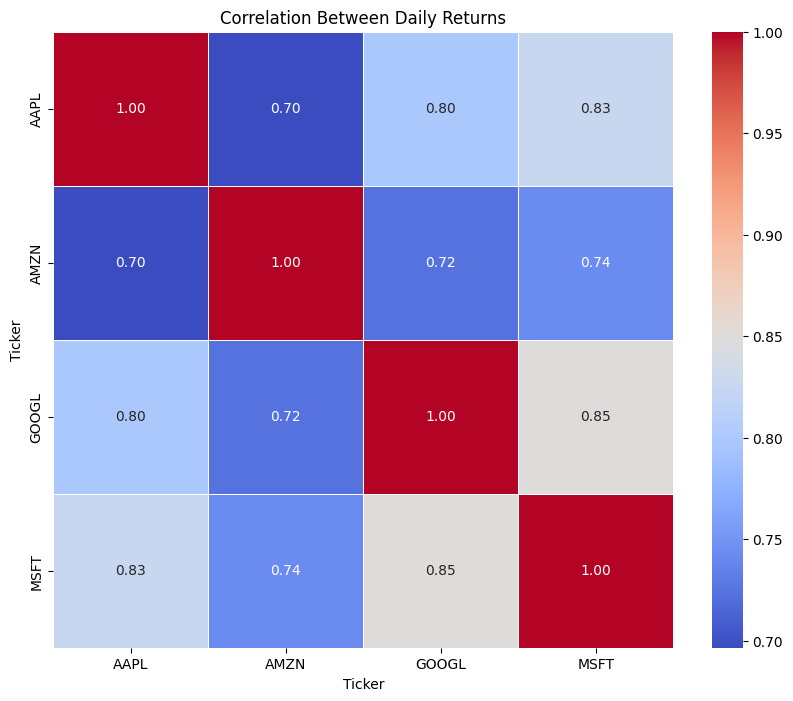

In [31]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the ticker symbols
tickers = ['AMZN','GOOGL','AAPL','MSFT']

# fetching historical stock data
stock_data = yf.download(tickers, start = '2022-01-01' , end = '2023-01-01' , progress=False)

# displaying the rows of the dataset .
df = pd.DataFrame(stock_data)

stock_data.head()

# Analyzing the data : change in stock price over time

daily_returns = stock_data['Adj Close'].pct_change().dropna()
daily_returns

# Moving average : calculating the moving average of the stock prices over a specific window .

moving_average = stock_data['Adj Close'].rolling(window=20).mean()
moving_average.head(20)
# The first 19 values in the series will be NaN because there are not enough data points to
# calculate the moving average.
# ploting the Adj Close column and the moving_average Series on the same graph to see how the moving average compares to the acutal stock prices.

plt.figure(figsize=(10,6))

stock_data['Adj Close'].plot(label='Adj Close')
moving_average.plot(label='Moving Average')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.show()

# Daily return average sotck : calculating the average daily return .
daily_return_avg = daily_returns.mean()
daily_return_avg



# Adding a new column 'Trend' based on 'Daily return' , i am defining a simple rule , like if the
# daily return is positive , the trend is 'Up' and if it's negative , the trend is 'Down' .

type(daily_returns)
daily_returns_numeric = daily_returns.values.flatten()
daily_returns_numeric = pd.Series(daily_returns_numeric, dtype='float')
print(len(daily_returns_numeric))
print(len(stock_data))
stock_data = stock_data.append(pd.DataFrame(np.nan, index=range(len(stock_data), len(daily_returns_numeric)), columns=stock_data.columns))
stock_data
stock_data['Trend'] = ['Up' if return_val > 0 else 'Down' for return_val in daily_returns_numeric]
stock_data

# change in stock volume over time :
     # plotting volume traded over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.title('Stock Volume Over Time')
plt.show()


# visualizing the Trend Frequency pie chart .
# calculating the frequency of each trends : visualizing the frequency of 'up' and 'down' trends .
trend_frequency = stock_data['Trend'].value_counts()
# Plotting trend frequency
plt.figure(figsize=(6, 6))
plt.pie(trend_frequency, labels=trend_frequency.index, autopct='%1.1f%%')
plt.title('Trend Frequency')
plt.show()


# correlation between Daily returns :
correlation_matrix = stock_data['Adj Close'].pct_change().dropna().corr()
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Daily Returns')
plt.show()
